<a href="https://colab.research.google.com/github/norquip/Machine_Learning_Python/blob/main/PCA_Abalone_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone

Abalone is a marine gastropod mollusk that lives inside a shell shaped like an ear. Other common names are "ear shells" or "sea ears." The flesh of abalone is widely appreciated in cuisines around the world.

The process of determining the age of an abalone is similar to that of determining the age of a tree. This is done by cutting the object perpendicularly to its long axis to obtain transversal sections that reveal the internal rings formed during its growth. An abalone's age (in years of life) is determined by the number of rings plus 1.5.

Cutting the shell and counting the rings can be very time-consuming and tedious. Alternatively, the age of an abalone can be predicted using its physical characteristics: length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight.

The dataset [Abalone](https://archive.ics.uci.edu/dataset/1/abalone) from the UC Irvine Machine Learning Repository consists of 4,177 measurements of the physical characteristics mentioned above. The dataset provided does not contain missing values.

Objective:

Apply PCA (Principal Component Analysis) for dimensionality reduction and evaluate its performance in predicting the age of abalones.

## Importing useful packages

In [1]:
# Basic modules
# ==================================================================
import numpy as np
import pandas as pd

#data visualization
# ==================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from plotnine import *


# Data preprocesing
# ==================================================================
from sklearn.preprocessing import QuantileTransformer
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


# Modeling data with Scikit-Learn
# ==================================================================
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, confusion_matrix, classification_report




In [2]:
# installing  and import uc repository
# ==================================================================
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

## Loading data

In [3]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets



## Exploratory Data Analysis

### General information

In [4]:
# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

From this information:
* There are 8 features, 7 are continuous and 1 categorical.
* The numerical feature variables can be classificed  as:  variable of size (*Length, Diameter and Heigth*) with measured in *mm*; variables of mass (*Whole weight,	Shucked weight,	Viscera weight,	Shell weight*) measured in *grams*.
* The variable *Sex* is categorical.    
* The target column is integer-type.
* The data set does not contain missing values


In [5]:
# Define a  complete data frame with target and features
df = pd.concat([X, y], axis=1)
# View the first 5 rows of data
df.head()

# Selecting variables for the EDA
# Categorical variable
df_cat = df['Sex']
# Numerical variables
df_num = df.drop(columns=['Sex'], axis = 1)

In [6]:
# Basic information of the total data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# Basic statistical information of the total data
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# count the number of zero values in Height
zero_height_count = (df['Height'] == 0).sum()
print(f"Number of zero values in 'Height': {zero_height_count}")

Number of zero values in 'Height': 2


These tables show that:

* The feature variables have observations that diverge noticeably from their mean.

* The target variable is an integer that ranges from 1 to 29, with a mean of 10 rings.

* The variable Height has two zero values.

* The features have different scales. For example, Shucked Weight has a much larger scale compared to Length.

### Distribution of data by Sex

In [9]:
dist_sex = df_cat.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'
dist_sex = pd.concat([ df_cat.value_counts(), dist_sex], axis=1)
dist_sex.columns = ['Count', 'pct']
dist_sex

,Count,pct
Sex,,
M,1528,36.6%
I,1342,32.1%
F,1307,31.3%


In [10]:
# Customer colors for the plots
hex_colors = {"F": "#F8766D", "I":"#00BA38", "M": "#619CFF"}
# Define the desired order for the 'Group' (hue) variable
desired_x_order = ['M', 'I', "F"]
# Define stily for the sns plots
sns.set(style='whitegrid')

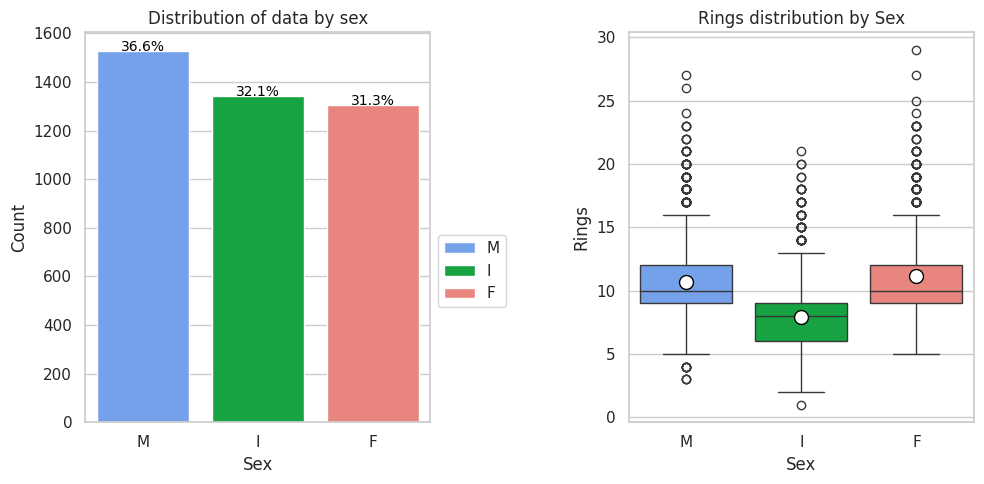

In [11]:
# Distribution of data by sex
plt.figure(figsize=(10, 5))
# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)
# bar plot
bar = sns.barplot(data= dist_sex, x = "Sex", y = "Count", hue = "Sex", palette = hex_colors, legend=True);
for i in range(len(dist_sex)):
    bar.text(i, dist_sex["Count"].iloc[i] + 0.08,  # Position the text slightly above the bar
            f"{dist_sex['pct'].iloc[i]}",  # Format as percentage with 1 decimal place
             fontdict=dict(color="black", fontsize=10),
             horizontalalignment="center")
# Put the legend out of the figure
bar.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of data by sex")


# Create the second subplot (1 row, 2 columns, second plot)
plt.subplot(1, 2, 2)
# Boxplot
sns.boxplot(data=df, x="Sex", y="Rings", hue = "Sex", orient="v", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, order = desired_x_order, palette= hex_colors).set(title = "Rings distribution by Sex")
#plt.xticks(rotation=0, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout(w_pad=4)

# Display the plots
plt.show()
#plt.show()


In [12]:
# prompt: compute the mean, median and mode  of rings by sex

# Compute mean, median, and mode of 'Rings' by 'Sex'
rings_by_sex = df.groupby('Sex')['Rings']

mean_rings_by_sex = rings_by_sex.mean()
median_rings_by_sex = rings_by_sex.median()
mode_rings_by_sex = rings_by_sex.apply(lambda x: x.mode().tolist()) # mode() can return multiple values

print("Mean of Rings by Sex:\n", mean_rings_by_sex)
print("\nMedian of Rings by Sex:\n", median_rings_by_sex)
print("\nMode of Rings by Sex:\n", mode_rings_by_sex)


Mean of Rings by Sex:
 Sex
F    11.129304
I     7.890462
M    10.705497
Name: Rings, dtype: float64

Median of Rings by Sex:
 Sex
F    10.0
I     8.0
M    10.0
Name: Rings, dtype: float64

Mode of Rings by Sex:
 Sex
F    [10]
I     [8]
M    [10]
Name: Rings, dtype: object


The measures of central tendency—mean, median, and mode—are less than 10 for Infants and equal to or greater than 10 for Females and Males.

## Distributions

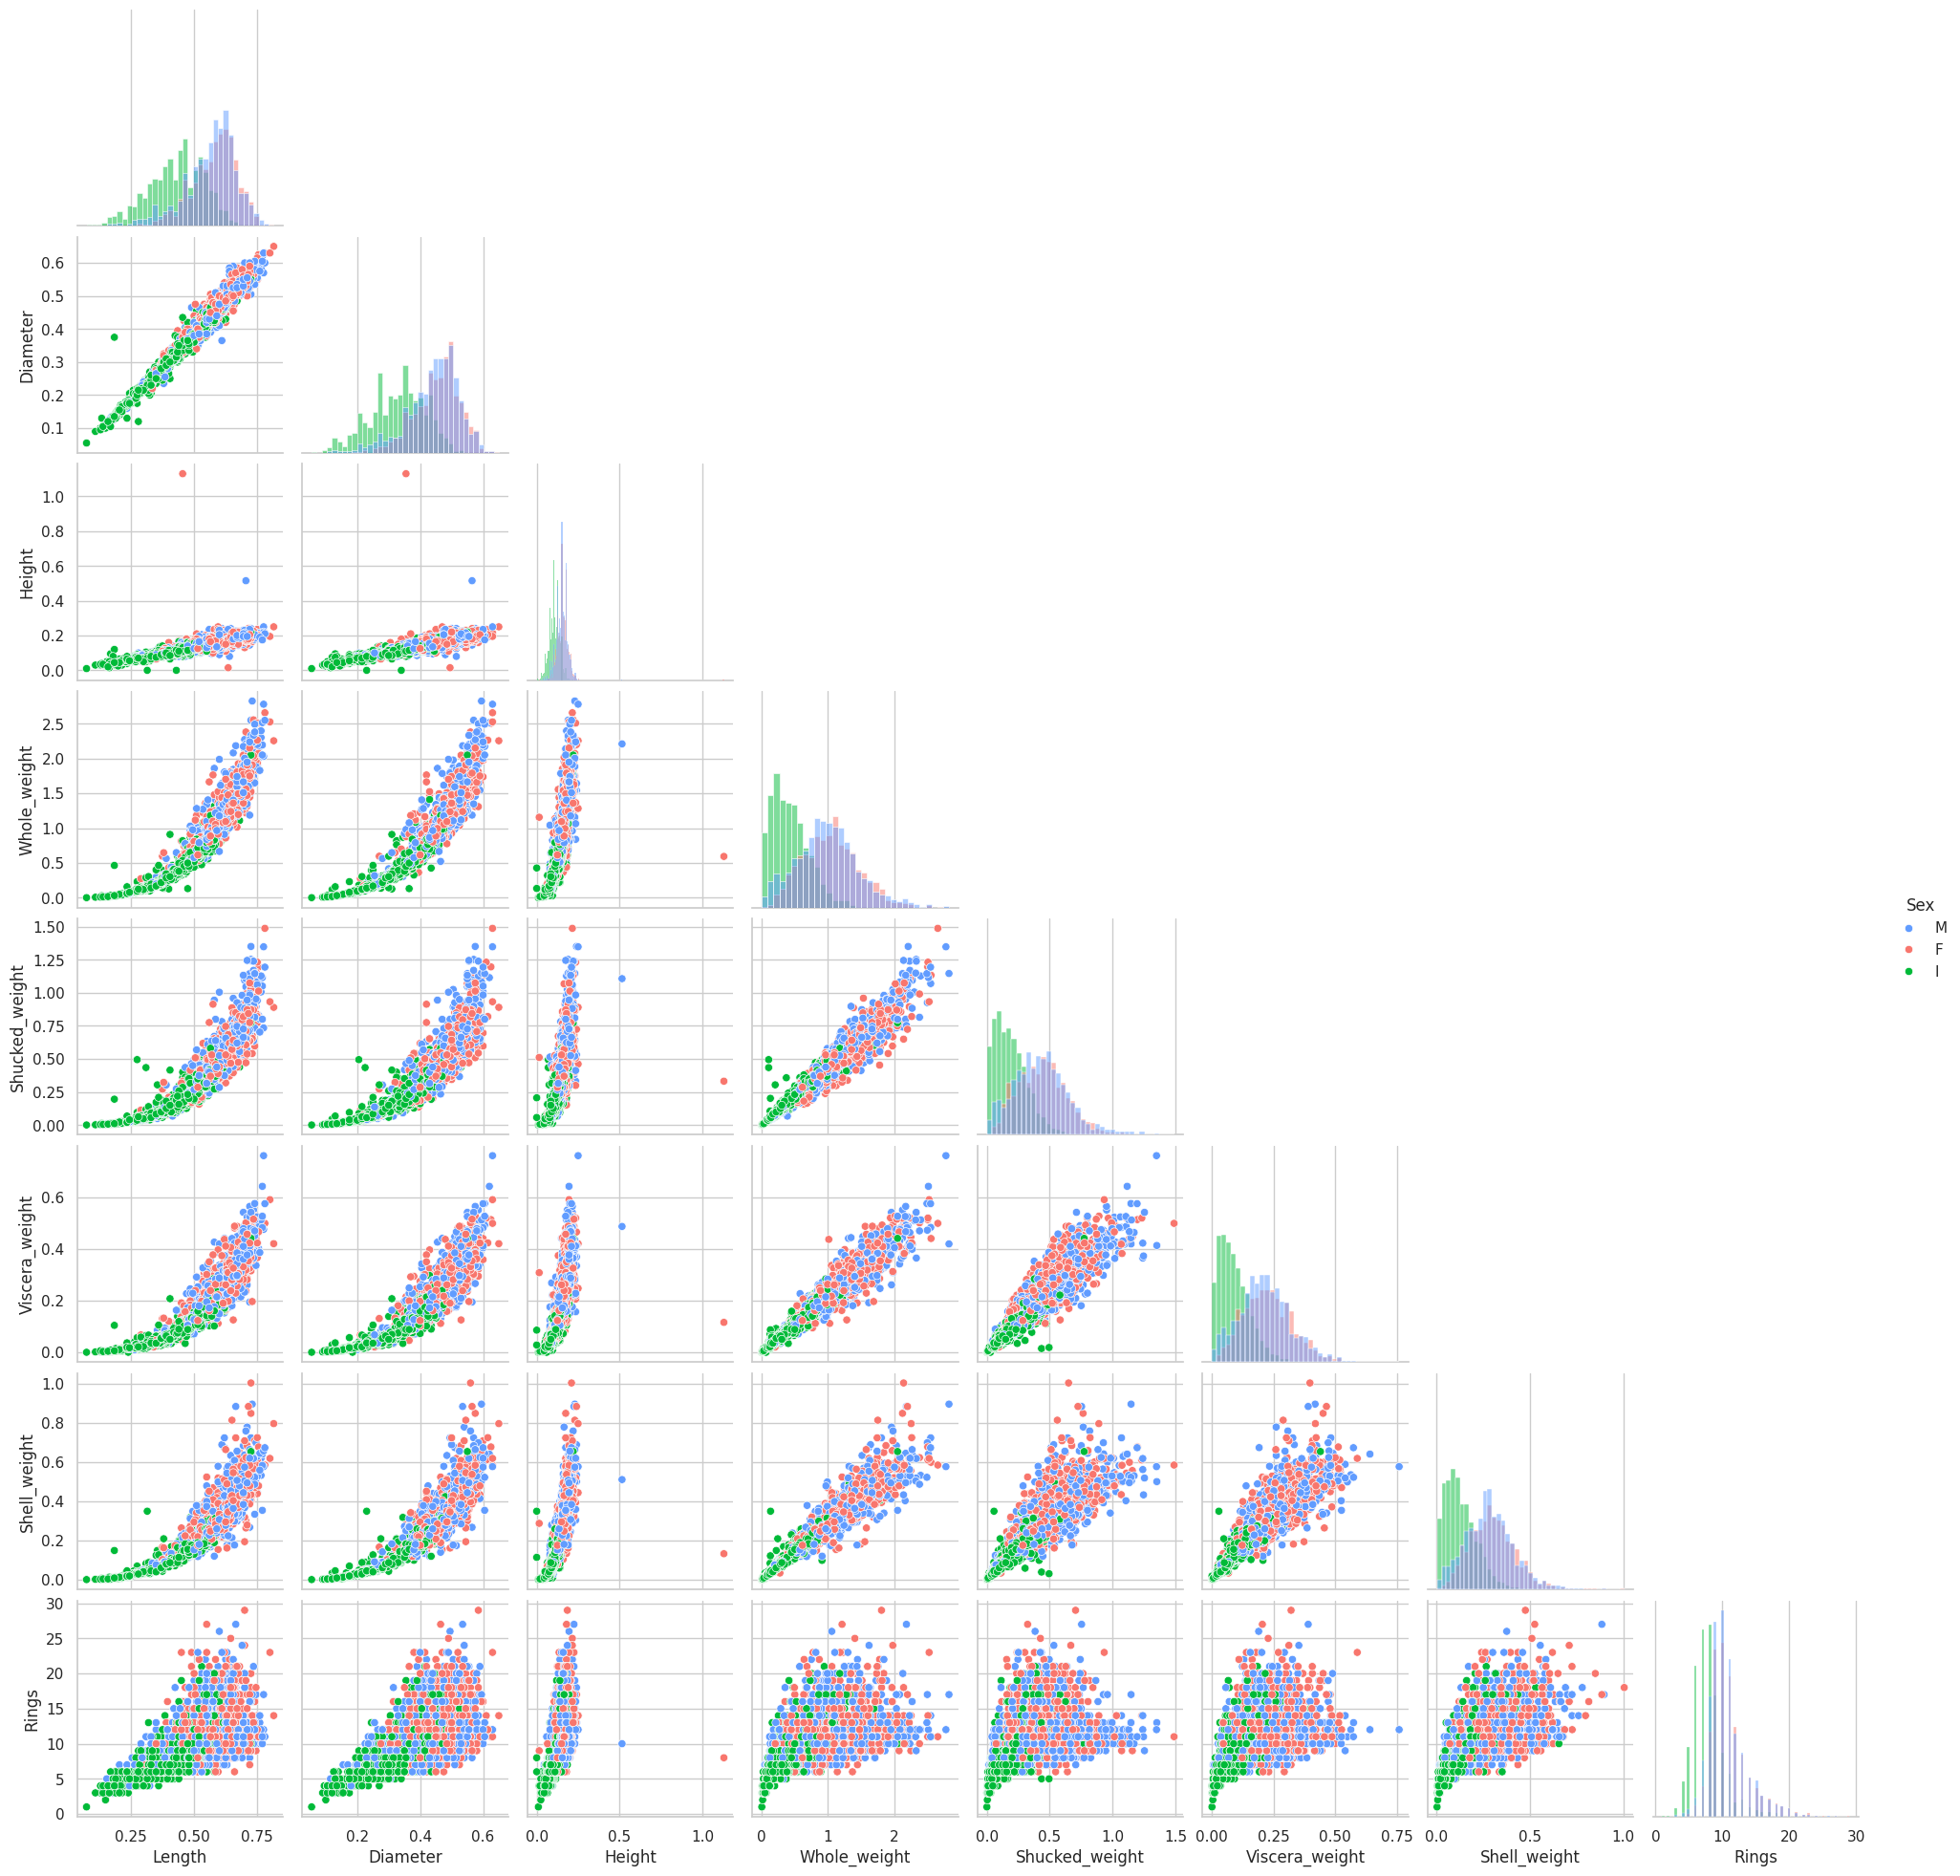

In [13]:
# Pair Scatter plots
sns.pairplot(df, hue='Sex', corner = True, diag_kind="hist", palette = hex_colors)
plt.show()

These pair plots show that:
 * The 3 variables of size have a linear relation between them.
 * The 4 variables of mass tend to follow  a cone shape relation between them.
 * The relation between the variables of mass and variables of size is no-lineal.
 * The relation between the variables of size and target also tend to have a cone form, while the variables of mass have more exotic relation with the target variable.


### Skewness

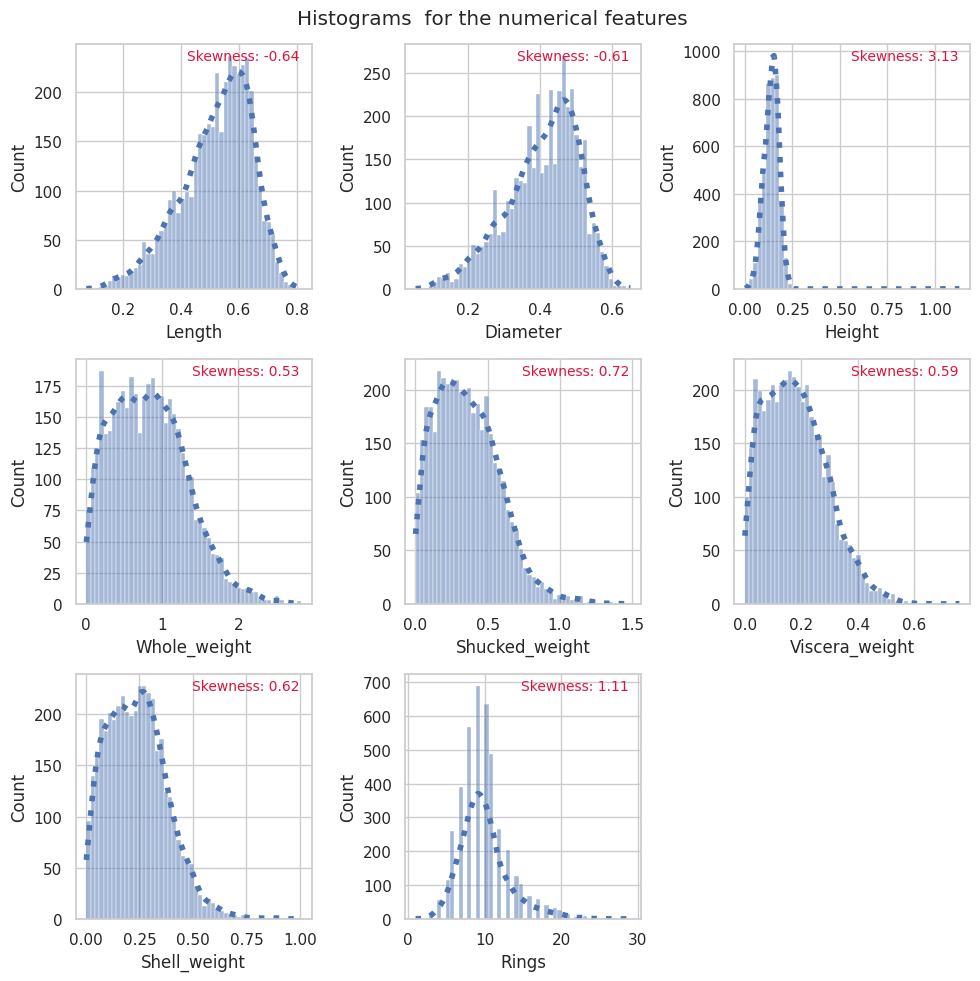

In [14]:
# compute skewness for all  numerical variables
df_num.skew()

# Histograms
plt.figure(figsize=(10, 10))

for i, col in enumerate(df_num.columns[:]):
    plt.subplot(3, 3, i + 1)  # grid to accomodate plots
    ax = sns.histplot(data=df, x=col, kde=True, bins=50, line_kws={'color': 'crimson', 'lw': 4,  'ls': ':'}).get_figure().gca()
    ax.annotate("Skewness: {:.2f}".format(df_num[col].skew()), xy=(0.95, 0.98), xycoords='axes fraction', ha='right', va='top',fontsize=10, color='crimson')


plt.suptitle("Histograms  for the numerical features")
plt.tight_layout()
plt.show()

* The variables of size *Length* and *Diameter* have a moderate negative skew of -0.6. The variable *Height* has a large positive skew of 3, with a histogram showing a longer tail on the right, indicating the presence of  outliers.

* Variables related to mass show a positive skew, also suggesting the presence of outliers.

* The targe variable *Rings* also exhibits a positive skew with outliers.

## Outliers

There presence of outliers indicated by the skewness of the feartures are observed in the following boxplots.


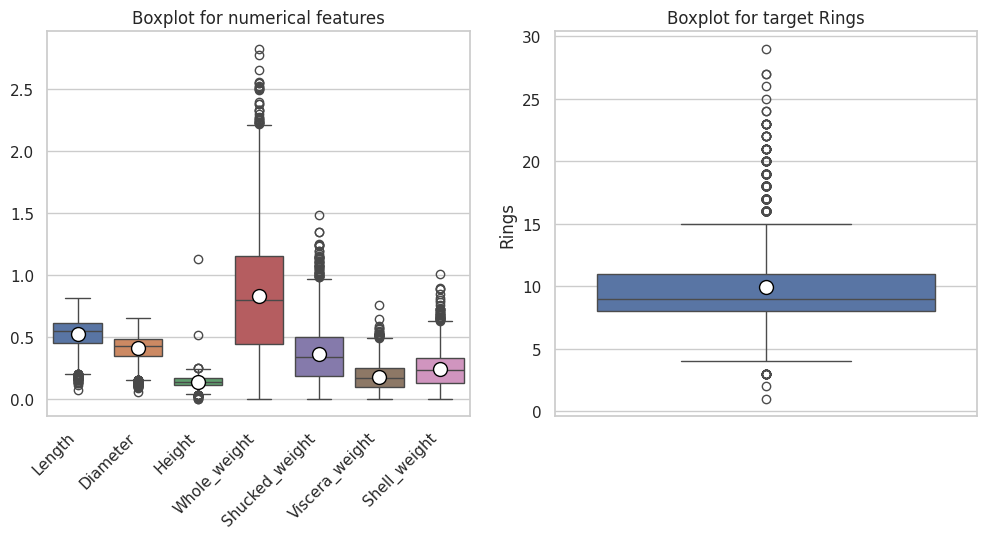

In [15]:
# Boxplots
plt.figure(figsize=(12, 5))
# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)
# boxplot for numerical features
sns.boxplot(data=df_num.drop("Rings", axis =1), orient="v", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}).set(title = "Boxplot for numerical features")
plt.xticks(rotation=45, ha='right')



# Create the second subplot (1 row, 2 columns, second plot)
plt.subplot(1, 2, 2)
# Boxplot
sns.boxplot(data=df["Rings"], orient="v", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}).set(title = "Boxplot for target Rings")





plt.show()

### Correlation between variables

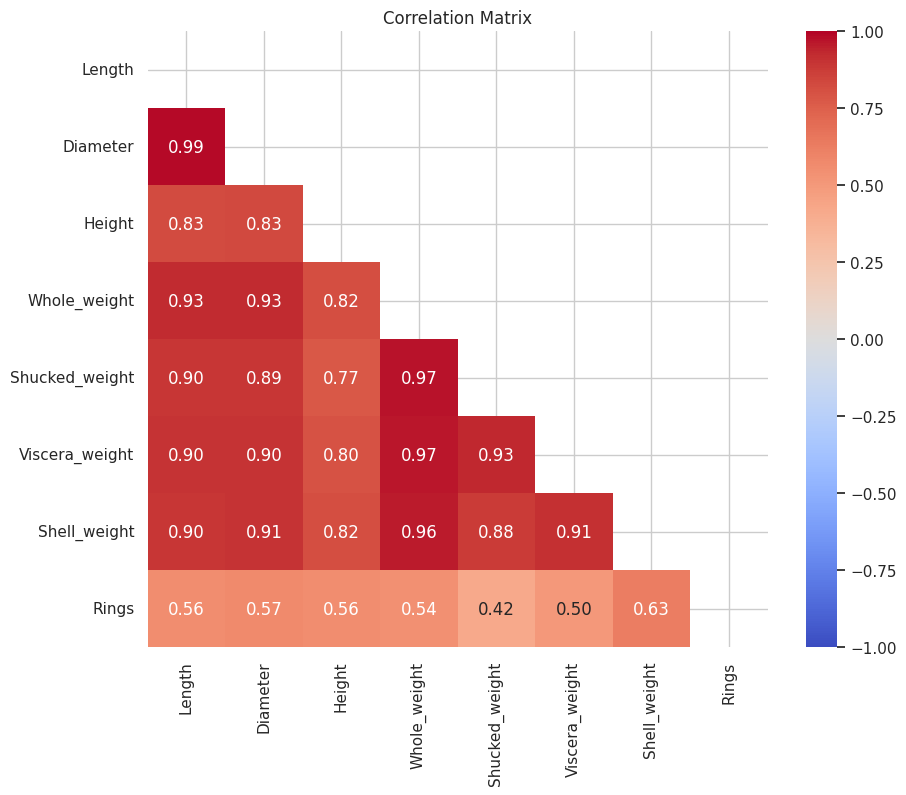

In [16]:
corr = df_num.corr()
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(corr, dtype=bool))
# Using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",mask = mask,vmin=-1, vmax=1,)
plt.title('Correlation Matrix')
plt.show()

This correlation matrix shows strong multicollinearity between the features. There is a moderated correlation between features and  target variables.

## Preprocesing



### Eliminating skewness to the numerical features

I applied a quantile transformation with a normal output distribution to transform the features so that they follow a standard normal distribution (mean = 0, variance = 1).
* To apply PCA, I selected only the numerical features in the variable $X$.

* After this transformation, data standardization is not needed.

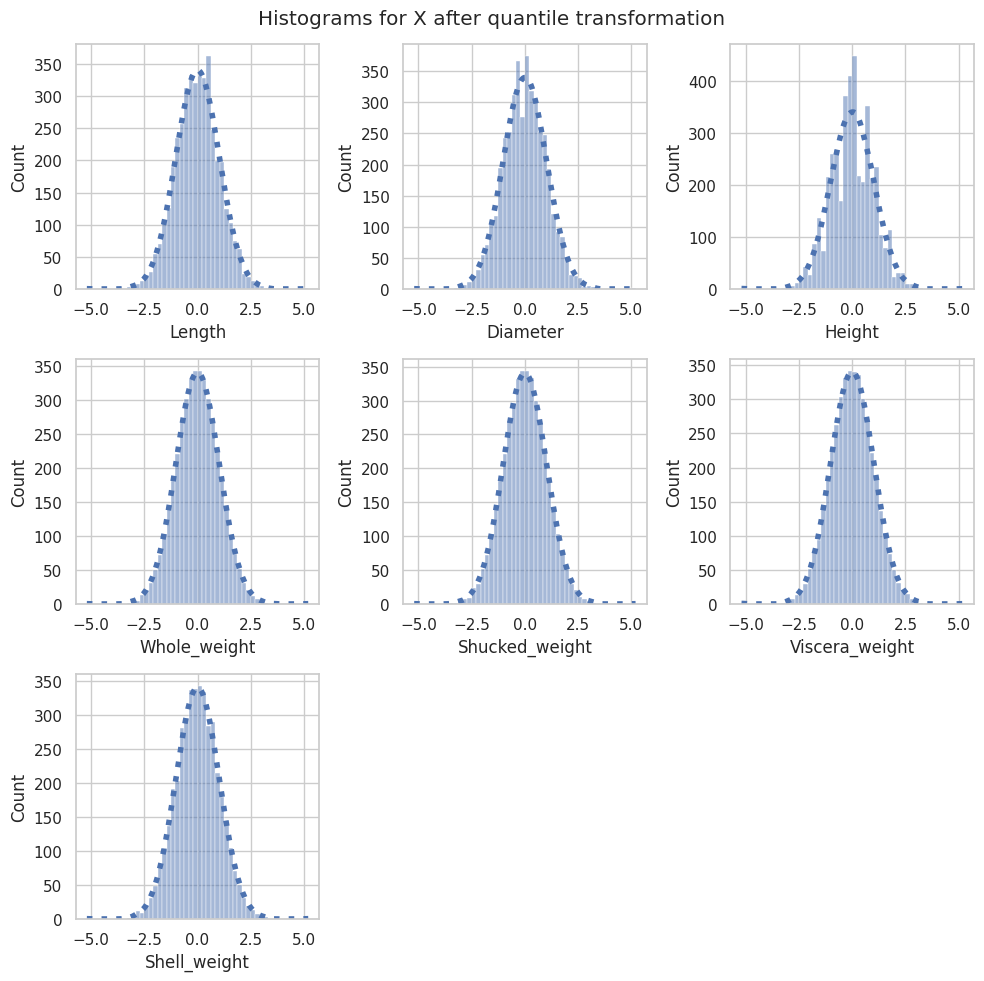

In [17]:
#  apply quantile transformation to X to convert the skwed distribution into a normal distribution
columns =  X.drop("Sex", axis = 1).columns
qt = QuantileTransformer(output_distribution='normal')
X_trf = qt.fit_transform(X.drop("Sex", axis = 1))

# Convert the transformed array back to a DataFrame for easier handling and plotting
X_normal = pd.DataFrame(X_trf, columns=columns)

# Plot histograms of the transformed data
plt.figure(figsize=(10, 10))
for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=X_normal, x=col, kde=True, bins=50, line_kws={'color': 'crimson', 'lw': 4,  'ls': ':'})


plt.suptitle("Histograms for X after quantile transformation")
plt.tight_layout()
plt.show()

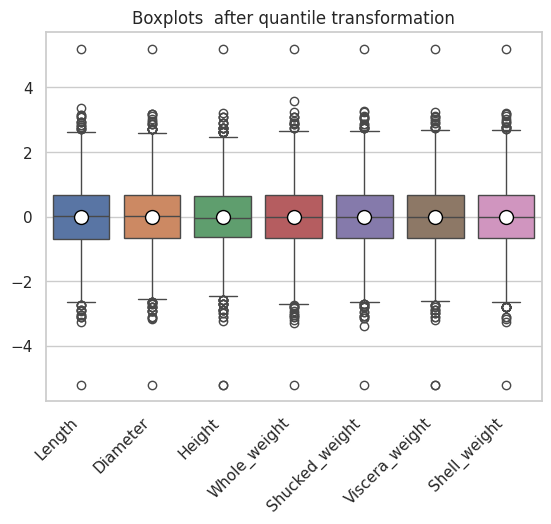

In [18]:
# Boxplots
sns.boxplot(data=X_normal, orient="v", showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}).set(title = "Boxplots  after quantile transformation")
#sns.swarmplot( data=df.drop("Pressure", axis =1), color=".2", size=3, orient="v")
plt.xticks(rotation=45, ha='right')

plt.show()



In [19]:
# prompt: compute the mean of A_df
mean_X_normal = X_normal.mean()
print("Mean of df_normal:")
mean_X_normal

Mean of df_normal:


,0
Length,0.000211
Diameter,-0.000136
Height,-0.000876
Whole_weight,0.000113
Shucked_weight,-0.000035
Viscera_weight,-0.000586
Shell_weight,-0.000059


In [20]:
#compute standar deviation of df_normal
std_X_normal = X_normal.std()
print("Standard deviation of df_normal:")
std_X_normal


Standard deviation of df_normal:


,0
Length,1.004006
Diameter,1.003408
Height,1.004134
Whole_weight,1.004349
Shucked_weight,1.004206
Viscera_weight,1.005628
Shell_weight,1.003636


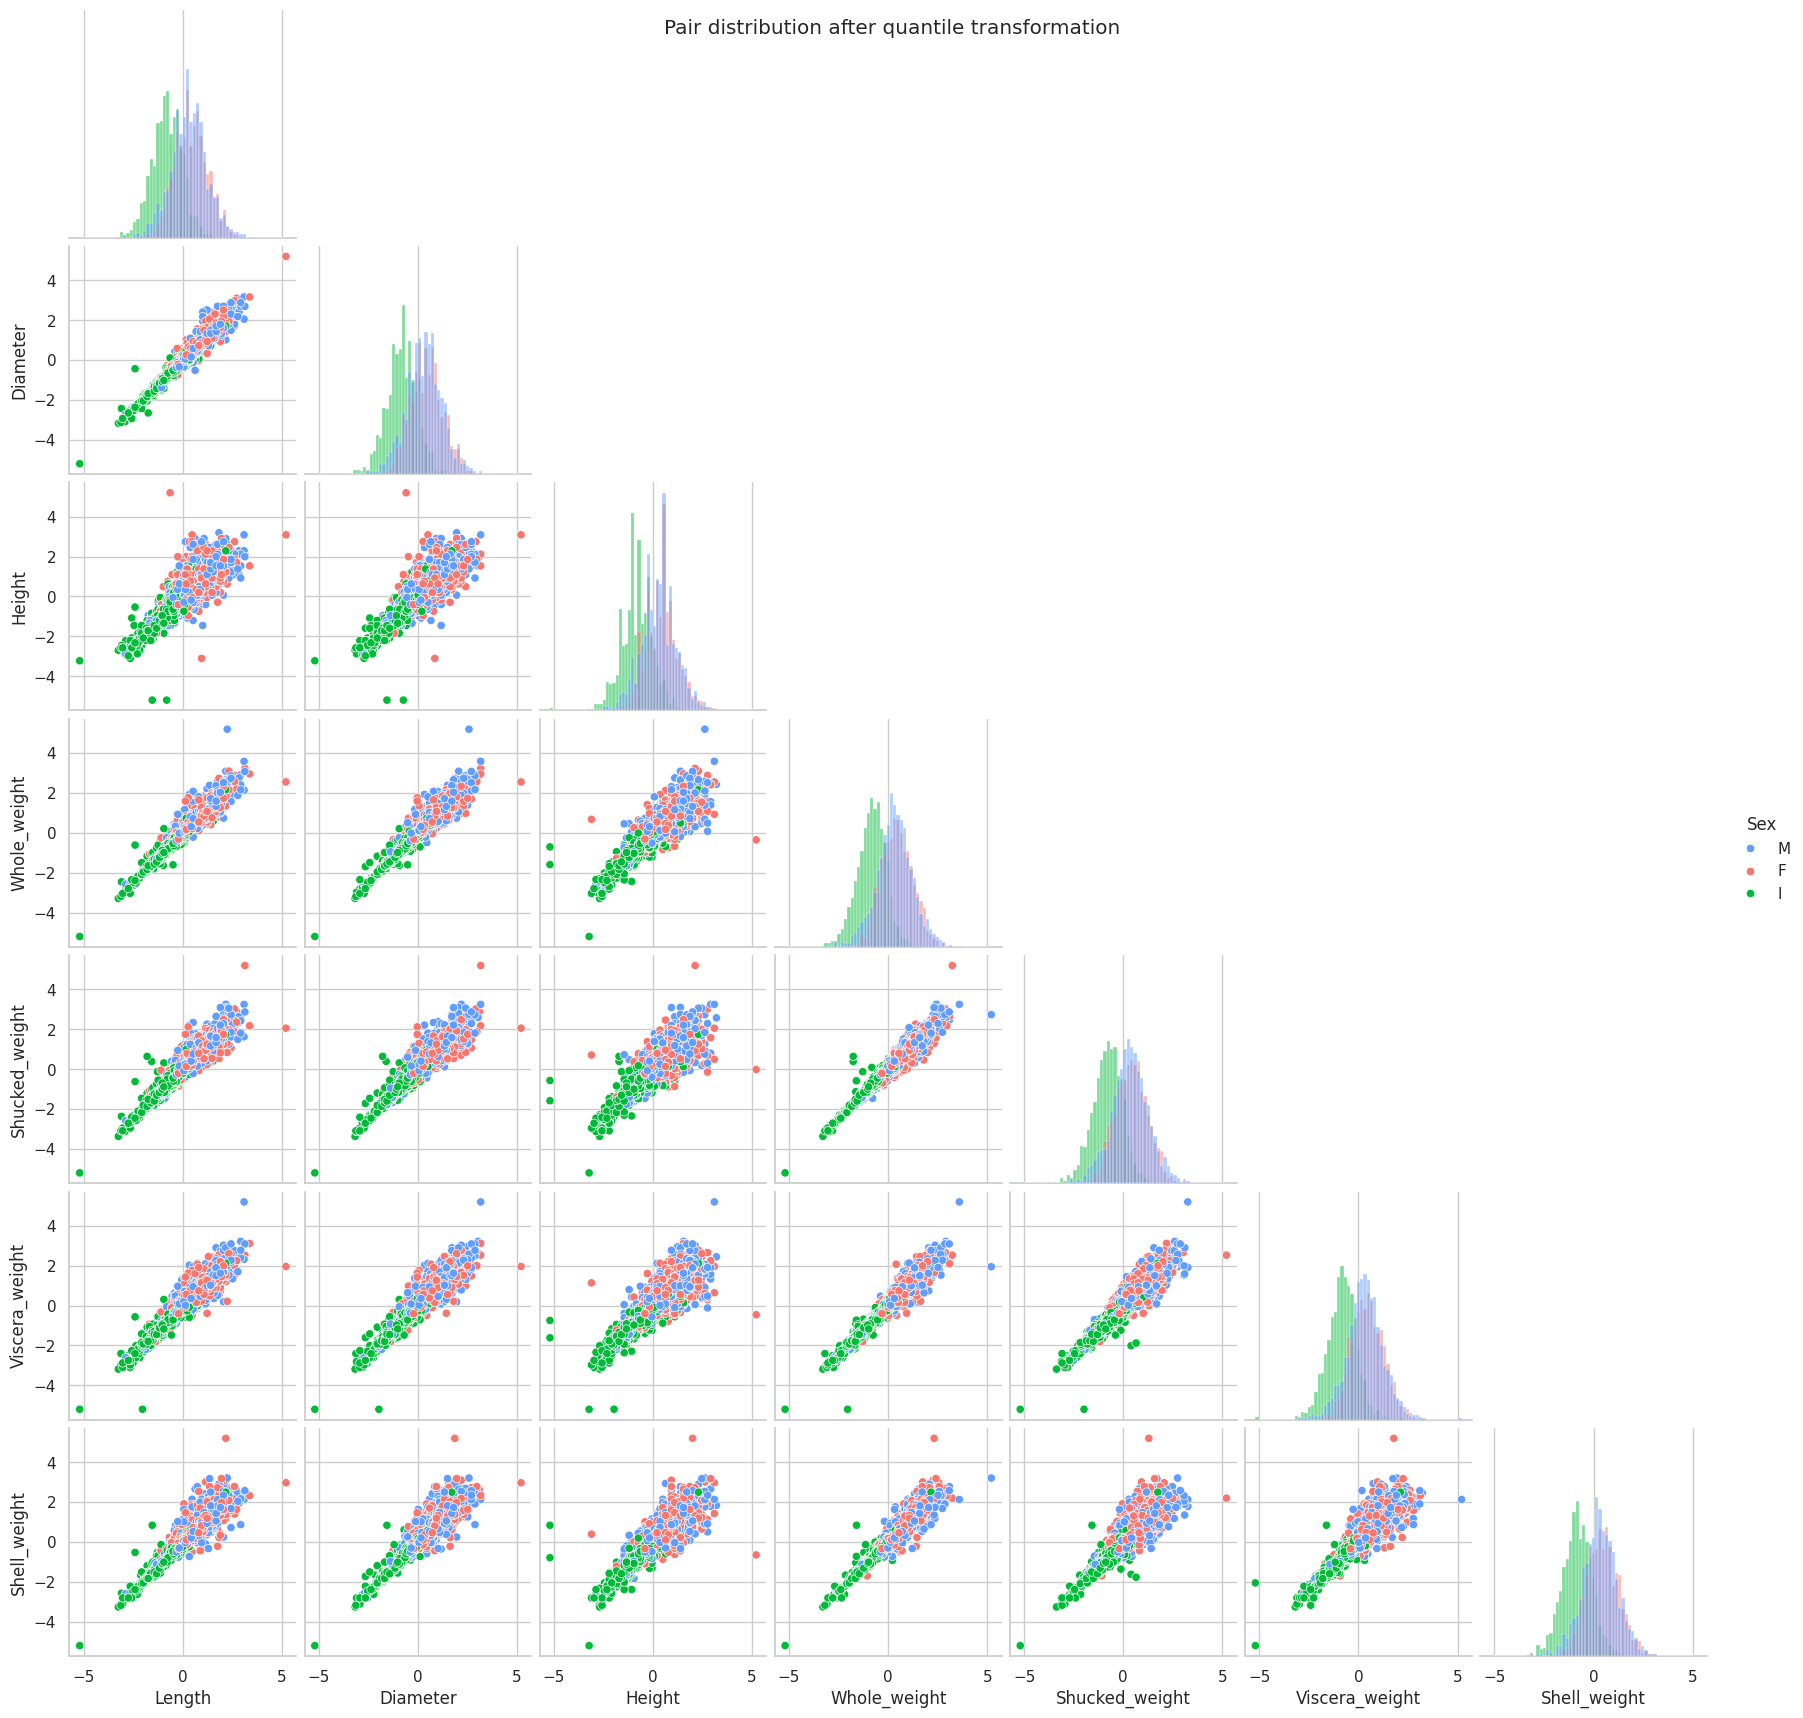

In [21]:
# Provide a copy of df_normal
X_normal_copy = X_normal.copy()
# Add sex column for the plot across sex
X_normal_copy['Sex'] = X['Sex']
# Pairplot for  copy
sns.pairplot(X_normal_copy, hue='Sex', corner = True, diag_kind="hist", palette = hex_colors)
plt.suptitle("Pair distribution after quantile transformation")
plt.show()


The quantile transformation eliminated skewness and made the relationships more linear or homogeneous in appearance. However, the non-lineal relation showed in the pair plots before the quantile transformation is still present retainin a  cone shape in many of the scatter pair plots.



## Making categories for the target variable

Since the median, mean and mode are less than 10 for infantas and 10 or more for Female or Male, I considered to classify the target variable with  a binary class, with class  0 denotes infants and class 1 denotes adults. After this classification the target becomes imbalanced.

In [22]:
# Create the binary target variable with numerical labels
y_binary= df['Rings'].apply(lambda x: 0 if x <= 10 else 1)

# Display the value counts to verify the new labels
display(y_binary.value_counts())

,count
Rings,
0,2730
1,1447


## Dimensional Reduction with PCA
###Computing the principal components with PCA from Scikit-learn, this use the SVD approach

In [23]:
# apply PCA
pca = PCA()
pca.fit(X_normal)

# dimensions of principal component loading vectors
print(pca.components_.shape)

# dimensions of principal component scores
print(pca.transform(X_normal).shape)




(7, 7)
(4177, 7)


In [24]:
# explained variance
pca_variance = pca.explained_variance_ratio_
print(pca_variance)

[0.94428712 0.02471962 0.0118751  0.00834059 0.00717709 0.002574
 0.00102649]


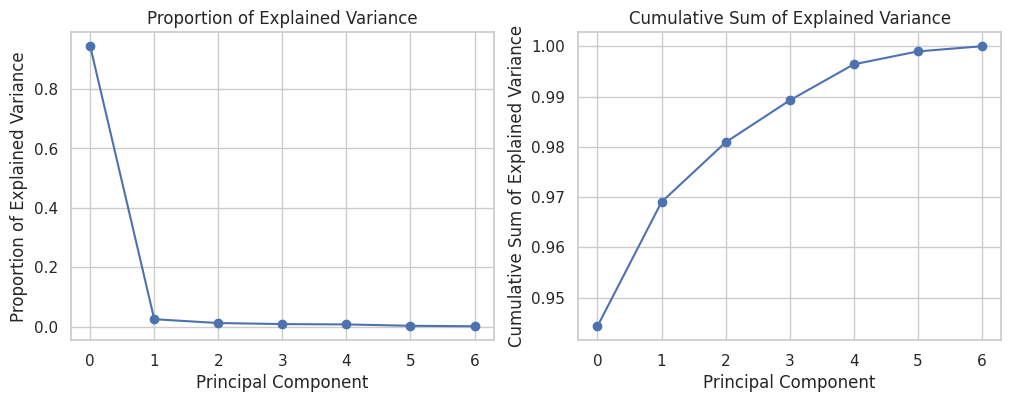

In [25]:
# plot explained variance
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(pca_variance, marker="o")
ax[0].set_xlabel("Principal Component")
ax[0].set_ylabel("Proportion of Explained Variance")
ax[0].set_title("Proportion of Explained Variance")

ax[1].plot(np.cumsum(pca_variance), marker="o")
ax[1].set_xlabel("Principal Component")
ax[1].set_ylabel("Cumulative Sum of Explained Variance")
ax[1].set_title("Cumulative Sum of Explained Variance")
plt.show()

These results show that the first principal direction (PC1) explains 94% of the variance. It means that most of the information (variance) in this dataset is captured in a single direction (PC1). The second principal direction (PC2) captures the 2%. I will consider a threshold of 95% in the cumulative sum; in such case, the first two principal components explain a variance above this threshold.

In [26]:
# The first two loadings (or principal directions)
pca.components_.T[:,0:2]

array([[ 0.38171153, -0.25432651],
       [ 0.38146122, -0.17750156],
       [ 0.36123373,  0.86205641],
       [ 0.38642323, -0.10672806],
       [ 0.37742404, -0.32288434],
       [ 0.379451  , -0.12623573],
       [ 0.37754333,  0.17055595]])

The matrix data $X$ has dimension (4177,7).  The matrix of orthonormal directions has dimension (7,7). After dimensional reduction to 2 principal components, the new matrix data $Y$ has dimension (4177,2)


The scores (or principal components) are the columns of $Y$.

The first score is given as:

\begin{align}
y_{i1} & =
   x_{i1} \, p_{11} + x_{i2}\, p_{21} + \ldots + x_{im}\, p_{m1}\\
& = 0.38 x_{i1} +0.38 x_{i2} +0.36 x_{i3} +0.39 x_{i4} +0.38 x_{i5} +0.38 x_{i6}+ 0.38 x_{i7}
\end{align}

The  second score is
\begin{align}
y_{i2} & =
   x_{i1} \, p_{12} + x_{i2}\, p_{22} + \ldots + x_{im}\, p_{m2}\\
& -0.25 x_{i1} - 0.18 x_{i2} +0.86 x_{i3} - 0.11 x_{i4} -0.32 x_{i5} -0.13 x_{i6}+ 0.17 x_{i7}
\end{align}

with $i = 1, \ldots, 4177$ denoting the observations.

In [29]:
# calculate principal component scores
pca_scores = pca.transform(X_normal)

# save pca_PC2 to feather for later usage
X_pca = pd.DataFrame(pca_scores[:, 0:2])
X_pca.columns = ["PC1", "PC2"]


In [30]:
X_pca

,PC1,PC2
0,-1.635137,-0.483535
1,-3.248223,-0.023975
2,-0.453778,0.008605
3,-1.383563,0.127693
4,-3.616727,-0.169366
...,...,...
4172,0.767737,0.335557
4173,0.642046,-0.465693
4174,2.214019,1.014871
4175,1.622205,-0.490234


The biplot with PC1 and PC2 and the loadings

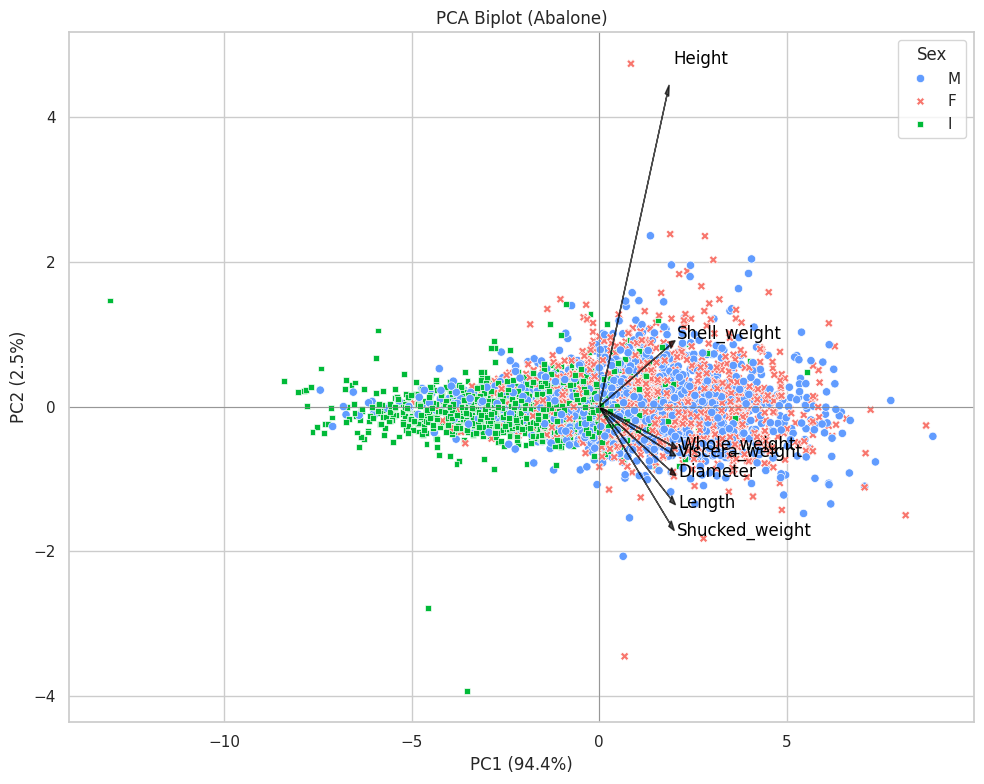

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Use plotnine's default color palette
sns.scatterplot(x=pca_scores[:, 0], y=pca_scores[:, 1], hue= df_cat , style= df_cat , palette= hex_colors) # Changed color to viridis, a plotnine default

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scores (PC1 vs PC2) colored by Sex")
# Plot the feature vectors
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0,
              pca.components_[0, i] * 5,
              pca.components_[1, i] * 5, color = "black", head_width=0.1, alpha=0.7)
    plt.text(pca.components_[0, i] * 5.5,
             pca.components_[1, i] * 5.5, X_normal.columns[i],
             color = "black", weight = "light",fontsize = 12)



plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA Biplot (Abalone)")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend(title="Sex")
plt.tight_layout()




plt.show()


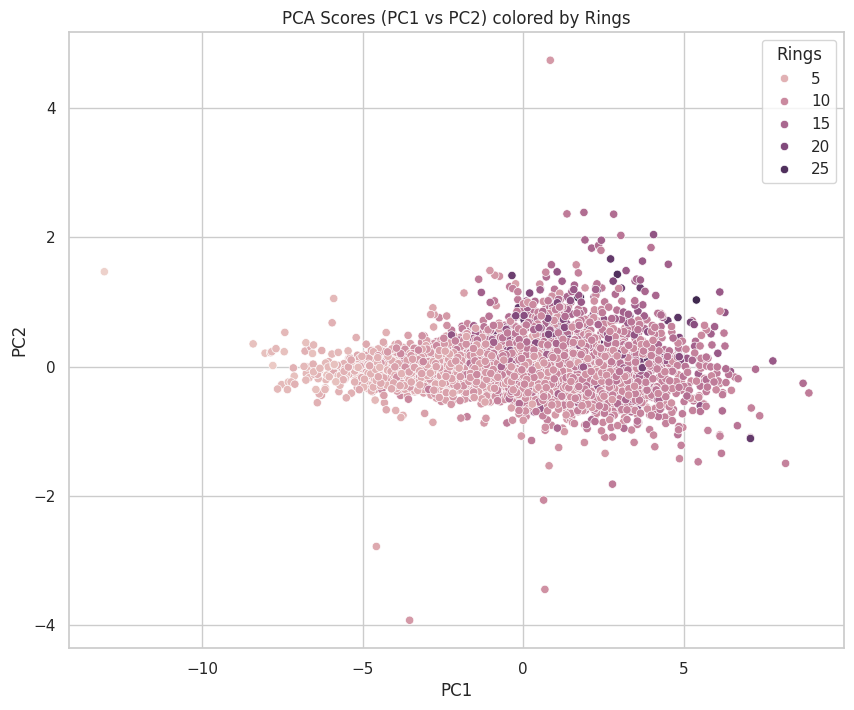

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca['PC1'], y=X_pca['PC2'], hue=y['Rings'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scores (PC1 vs PC2) colored by Rings")
plt.show()

# Modeling with PCA variables and Random Forest

* Here, I used PCA to reduce the number of variables and selected only the first two PC variables. I also categorize the variable $y$ into binary classes.


In [33]:
X_num = X.drop("Sex", axis = 1)
 # Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Step 2: Apply Quantile Transformation on the training data
quantile_transformer = QuantileTransformer(output_distribution='uniform')  # Or 'normal' for Gaussian
X_train_transformed = quantile_transformer.fit_transform(X_train)

# Step 3: Apply the same transformation to the test data (using the same fitted transformer)
X_test_transformed = quantile_transformer.transform(X_test)

In [34]:
# Step 4: Apply Kernel PCA on the transformed training data
pca = PCA(n_components=2)
# Fit PCA on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

In [36]:
# Step 6: Train a model (e.g., Random Forest) on the transformed data
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_pca, y_train)

# Step 7: Predict on the test set
y_pred = rf.predict(X_test_pca)

# Step 8: Evaluate the model performance
print("Random Forest Classifier (Binary) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Classifier (Binary) Results:
Accuracy: 0.7141148325358851
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       546
           1       0.60      0.51      0.55       290

    accuracy                           0.71       836
   macro avg       0.68      0.67      0.67       836
weighted avg       0.71      0.71      0.71       836

Confusion Matrix:
 [[448  98]
 [141 149]]


Conclusions:
* The relationship between features is linear for size variables and nonlinear for mass variables.
* The relationship between the features and the target seems to be nonlinear and exhibits heteroscedasticity..
* Although the first two principal components in the PCA dimensionality reduction explain 96% of the variance, PCA is limited in fully capturing the dataset's complexity. The Random Forest method with two PCA variables performs well in recognizing class 0, but is less effective for class 1. It could be due to nonlinear relationships between the variables.


## References

1. [Confusion](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another)
2. [Neuromatch](https://compneuro.neuromatch.io/tutorials/W1D4_DimensionalityReduction/student/W1D4_Tutorial2.html)